INF8770 Technologies multimédias 

Polytechnique Montréal

Exemple de calcul des moments invariants

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils

Création d'une image binaire. Affichage.

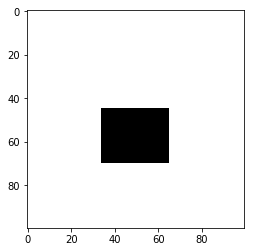

In [2]:
image = np.zeros((100,100))
image[45:70,34:65] = 1
plt.imshow(image, plt.get_cmap('binary'))
plt.show()

Aire de la forme. 

In [3]:
moment00 = sum(sum(image))
print(moment00)

775.0


moment10 et moment01 de la forme. Calcul aussi des centres de masse. 

In [4]:
moment10 = 0.0
moment01 = 0.0

for i in range(0, len(image)):
    for j in range(0, len(image[0])):
        moment10 += i*image[i,j]
        moment01 += j*image[i,j]
        
print(moment10)
print(moment01)
centrex = moment10 / moment00
centrey = moment01 / moment00
print(centrex)
print(centrey)

44175.0
37975.0
57.0
49.0


eta20, eta02, et eta11 invariant à la position et à l'échelle.

In [5]:
eta20 = 0.0
eta02 = 0.0
eta11 = 0.0

for i in range(0, len(image)):
    for j in range(0, len(image[0])):
        eta20 += (i-centrex)**2 * image[i,j] #Invariance à la position.
        eta02 += (j-centrey)**2 * image[i,j]
        eta11 += (i-centrex) * (j-centrey) * image[i,j]
        
eta20 = eta20 / moment00**2 #Invariance à l'échelle
eta02 = eta02 / moment00**2 
eta11 = eta11 / moment00**2

print(eta20)
print(eta02)
print(eta11)

0.06709677419354838
0.1032258064516129
0.0


Vérification avec opencv. Note: nuij correspond à $\eta_{ij}$...

In [6]:
moment = cv2.moments(image)
print(moment)

{'m00': 775.0, 'm10': 37975.0, 'm01': 44175.0, 'm20': 1922775.0, 'm11': 2164575.0, 'm02': 2558275.0, 'm30': 100291975.0, 'm21': 109598175.0, 'm12': 125355475.0, 'm03': 150415875.0, 'mu20': 62000.0, 'mu11': 0.0, 'mu02': 40300.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.1032258064516129, 'nu11': 0.0, 'nu02': 0.06709677419354838, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


Calcul des moments de Hu

In [7]:
momentHu1 = eta20 + eta02
momentHu2 = (eta20 - eta02)**2 + 4 * eta11**2
print(momentHu1)
print(momentHu2)

0.1703225806451613
0.0013053069719042667


Calcul avec opencv

In [8]:
momentsHu = cv2.HuMoments(moment)
print(momentsHu)

[[0.17032258]
 [0.00130531]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


Test de l'invariance aux translations.

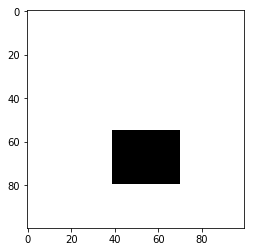

{'m00': 775.0, 'm10': 41850.0, 'm01': 51925.0, 'm20': 2321900.0, 'm11': 2803950.0, 'm02': 3519275.0, 'm30': 132078600.0, 'm21': 155567300.0, 'm12': 190040850.0, 'm03': 241191625.0, 'mu20': 62000.0, 'mu11': 0.0, 'mu02': 40300.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.1032258064516129, 'nu11': 0.0, 'nu02': 0.06709677419354838, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


In [9]:
image = np.zeros((100,100))
image[55:80,39:70] = 1 #Translation en x et y
plt.imshow(image, plt.get_cmap('binary'))
plt.show()
moment = cv2.moments(image)
print(moment)

mij ne sont pas invariants aux rotations, car on ne soustrait pas le centre de centre. Les muij soustraient le centre. On voit que les résultats sont similaires à ceux précédents. Même chose pour nuij. Testons l'invariance à la rotation.  

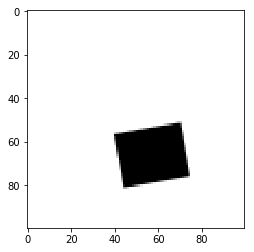

{'m00': 774.8955078125, 'm10': 44085.044921875, 'm01': 51178.0810546875, 'm20': 2569523.86328125, 'm11': 2907897.392578125, 'm02': 3421141.2744140625, 'm30': 153176874.7421875, 'm21': 169282877.10546875, 'm12': 194144825.99023438, 'm03': 231375729.0263672, 'mu20': 61455.14153818926, 'mu11': -3705.500411137473, 'mu02': 41077.82839660812, 'mu30': -10.521272957324982, 'mu21': -58.361665366217494, 'mu12': 87.18469202751294, 'mu03': -1.6319489479064941, 'nu20': 0.10234625051452685, 'nu11': -0.0061710715144035495, 'nu02': 0.06841025194058764, 'nu30': -6.294488287117647e-07, 'nu21': -3.4915624806462163e-06, 'nu12': 5.215937510689455e-06, 'nu03': -9.763346678141032e-08}


In [10]:
imagemodif = imutils.rotate(image, 10)
plt.imshow(imagemodif, plt.get_cmap('binary'))
plt.show()
moment = cv2.moments(imagemodif)
print(moment)

À cause des erreurs d'interpolation les valeurs changent légèrement. On constate quand même la robustesse aux rotations. Testons l'invariance à la mise à l'échelle.

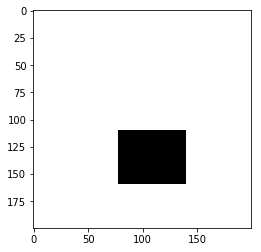

{'m00': 3100.0, 'm10': 336350.0, 'm01': 416950.0, 'm20': 37486750.0, 'm11': 45239075.0, 'm02': 56725350.0, 'm30': 4282744550.0, 'm21': 5041967875.0, 'm12': 6154700475.0, 'm03': 7803219250.0, 'mu20': 992775.0, 'mu11': 0.0, 'mu02': 645575.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.10330645161290322, 'nu11': 0.0, 'nu02': 0.0671774193548387, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


In [11]:
imagemodif2 = imutils.resize(image, 200) #L'image sera 2 fois plus grosses.
plt.imshow(imagemodif2, plt.get_cmap('binary'))
plt.show()
moment = cv2.moments(imagemodif2)
print(moment)

Ici, seules les valeurs de nuij seront similaires, car on divise par une puissance de l'aire.